# Simulation of proposed CyanoClean circuit

Goal: explore the dynamics of key concentrations of the enginered cyano bacterium

See below the schematic of the mechanic including the degradation of the pesticide, connected to a kill switch.

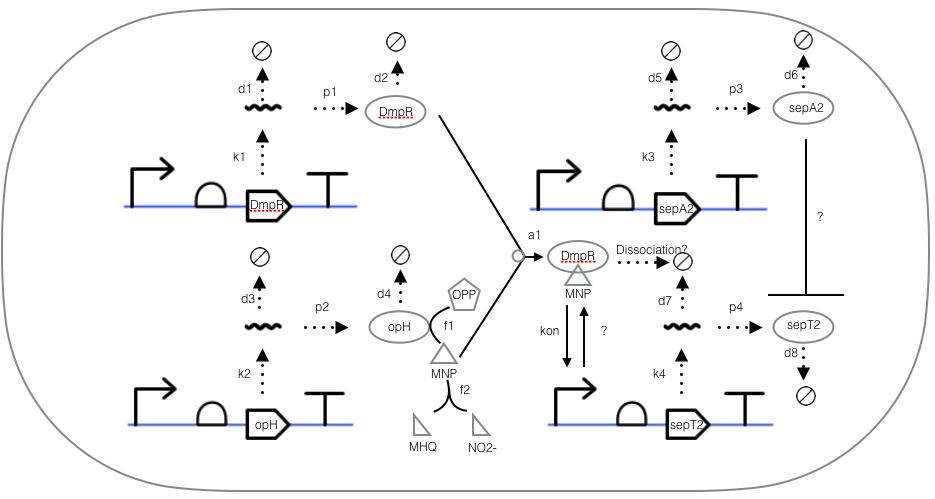


In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
OOP, MNP, DmpR_MNP = 0, 0, 0
mopH, opH, mDmpR, DmpR, msepT2, sepT2, msepA2, sepA2 = 0, 0, 0, 0, 0, 0, 0, 0

def activation(c, K, n):
    return c**n / (c**n + K**n)

def mechanism(y=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), t=[0, 0.5, 1]):
    mopH, opH, mDmpR, DmpR, msepT2, sepT2, msepA2, sepA2, OOP, MNP, DmpR_MNP = y
    
    dmopH, dopH, dmDmpR, dDmpR, dmsepT2, dsepT2, dmsepA2, dsepA2, dOOP, dMNP, dDmpR_MNP = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    
    # b_m, b_p : elimination by dilution (cell growth) and degradation of mRNA and protein
    # unit per time
    
    # lambda_p : transcription of protein from mRNA
    # unit per time
    
    # a_m : production rate of mRNA
    # concentration per time
    
    # f1 : pesticide decomposition rate
    # unit per concentration per time
    
    # a1 : association rate MNP+DmpR
    # unit per concentration per time

    # d1 : disssociation rate MNP+DmpR
    # unit per concentration per time

    # annihili : annihilation rate sepA2+sepT2
    # unit per concentration per time
    
    # for time scale use protein lifetime tau_p = 1/b_p
    #  i.e. rescale time with 1*b_p, such that b_p is set to 1
    
    b_p_star = 0.027
    b_p = 1
    
    b_m = 3.7         # 0.1/b_p_star
    a_m = 1           # ???
    lambda_p = 67     # 1.8/b_p_star
    
    f1 = 0.1
    a1 = 5
    d1 = 1
    annihil = 10
    
    lambda_opH = lambda_DmpR = lambda_sepA2 = lambda_sepT2 = lambda_p

    dmopH = a_m - b_m * mopH
    dopH = lambda_opH * mopH - b_p*opH
    
    dmDmpR = a_m - b_m * mDmpR
    dDmpR = lambda_DmpR * mDmpR - b_p*DmpR - a1 * MNP * DmpR + d1 * DmpR_MNP
    
    dOOP =  -f1 * OOP * opH
    dMNP = 2*f1 * OOP * opH - a1 * MNP * DmpR + d1 * DmpR_MNP
    dDmpR_MNP = a1 * MNP * DmpR - b_p*DmpR_MNP
    
    dmsepA2 = a_m - b_m * msepA2
    dsepA2 = lambda_sepA2 * msepA2 - b_p*sepA2 - annihil*sepT2*sepA2
    
    dmsepT2 = activation(DmpR_MNP, 50, 1) - b_m * msepT2
    dsepT2 = lambda_sepT2 * msepT2 - b_p*sepT2 - annihil*sepT2*sepA2
    
    
    return [dmopH, dopH, dmDmpR, dDmpR, dmsepT2, dsepT2, dmsepA2, dsepA2, dOOP, dMNP, dDmpR_MNP]

# MHQ, NO2- reachtion ? does MNP get degraded into those?


In [3]:
@interact(mopH=(0,10,0.5), opH=(0,10,0.5), mDmpR=(0,10,0.5), DmpR=(0,10,0.5), msepT2=(0,10,0.5), sepT2=(0,10,0.5), msepA2=(0,10,0.5), sepA2=(0,10,0.5), OOP=(0,10,0.5), MNP=(0,10,0.5), DmpR_MNP=(0,10,0.5))
def simulate(mopH=1, opH=0, mDmpR=2, DmpR=0, msepT2=0, sepT2=0, msepA2=3, sepA2=0, OOP=0, MNP=0, DmpR_MNP=0):
    initial = (mopH, opH, mDmpR, DmpR, msepT2, sepT2, msepA2, sepA2, OOP, MNP, DmpR_MNP)
    #initial = (0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0)
    #initial = (2, 0, 1.5, 0, 0, 0, 0.5, 1, 0, 0, 0)
    t = np.arange(0, 10.1, 0.1)
    mopH, opH, mDmpR, DmpR, msepT2, sepT2, msepA2, sepA2, OOP, MNP, DmpR_MNP = list(zip(*odeint(mechanism, initial, t)))
    labels = ["mopH", "opH", "mDmpR", "DmpR", "msepT2", "sepT2", "msepA2", "sepA2", "OOP", "MNP", "DmpR_MNP"]
    colors = ['green']*2 + ['blue']*2 + ['black']*2 + ['purple']*2 + ['red', 'orange', 'yellow']
    linestyles = [':','--']*4+['-']*3

    plt.figure(figsize=(9,5), dpi=100)
    for i, series in enumerate([mopH, opH, mDmpR, DmpR, msepT2, sepT2, msepA2, sepA2, OOP, MNP, DmpR_MNP]):
        plt.plot(t, series, label=labels[i], color = colors[i], linestyle=linestyles[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.ylim([10e-3, 150])
    plt.yscale('log')
    plt.ylabel('concentration [a.u.]')
    plt.xlabel('time [rescaled by protein lifetime t_p]')

interactive(children=(FloatSlider(value=1.0, description='mopH', max=10.0, step=0.5), FloatSlider(value=0.0, d…

Explore how the circuit reacts for different initial conditions. 

You see the mRNA concentrations as dotted lines and the related protein concentrations in dashed lines of the same color. 
You see how the system evolve into a steady state where production and degradation are equally fast.

Introduce pesticide OOP and try to understand what happens.

What behavior did you expect? How can we tell if the kill switch works?